In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [6]:
# Question 1: Use yfinance to Extract Stock Data for Tesla

In [7]:
import yfinance as yf

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract stock information and save it in a dataframe
tesla_data = tesla_ticker.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [8]:
# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parse the html data
soup = BeautifulSoup(html_data, "html.parser")

# Extract the table with Tesla Revenue
tables = pd.read_html(str(soup))
tesla_revenue = tables[0]

# Rename columns to Date and Revenue
tesla_revenue.columns = ["Date", "Revenue"]

# Remove the comma and dollar sign from the Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)

# Remove any null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display the last five rows of the dataframe
print(tesla_revenue.tail())


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [10]:
# Question 3: Use yfinance to Extract Stock Data for GameStop

In [11]:
# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract stock information and save it in a dataframe
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [12]:
# Question 4: Use Webscraping to Extract GameStop Revenue Data

In [13]:
# Download the webpage
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_2).text

# Parse the html data
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Extract the table with GameStop Revenue
tables_2 = pd.read_html(str(soup_2))
gme_revenue = tables_2[0]

# Rename columns to Date and Revenue
gme_revenue.columns = ["Date", "Revenue"]

# Remove the comma and dollar sign from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)

# Remove any null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display the last five rows of the dataframe
print(gme_revenue.tail())


    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


In [15]:
# Question 5: Plot Tesla Stock Graph

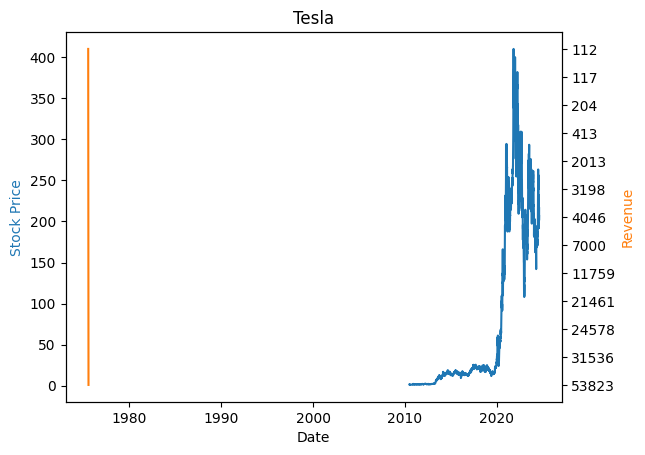

In [16]:
import matplotlib.pyplot as plt

def make_graph(data, revenue, title):
    fig, ax1 = plt.subplots()

    ax1.plot(data['Date'], data['Close'], color='tab:blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue['Date'], revenue['Revenue'], color='tab:orange')
    ax2.set_ylabel('Revenue', color='tab:orange')

    plt.title(title)
    plt.show()

# Plot Tesla Stock Data
make_graph(tesla_data, tesla_revenue, 'Tesla')


In [17]:
# Question 6: Plot GameStop Stock Graph

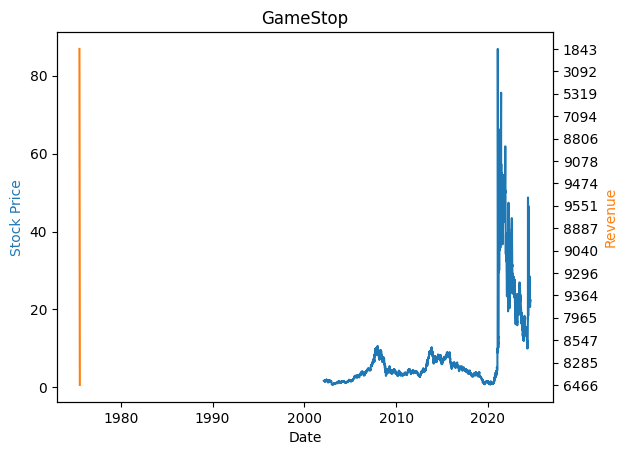

In [18]:
# Plot GameStop Stock Data
make_graph(gme_data, gme_revenue, 'GameStop')
